<a href="https://colab.research.google.com/github/adexdams/ml-supervised-learning/blob/main/02_Supervised_learning_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **End-to-End Heart Disease Classification**

## **Introduction**

By: Adedamola Adediran

The model predicts classifies features into those that meet target (heart disease) or not based on medical attributes.

The approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## **Problem Statement**

Given the data or medical information of various patient, can we predict whether the patient has heart disease or not.

## **Data**

**Source of data:**
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## **Evaluation**

If we can reach 95% accuracy at predicting positive targets (true heart disease), we will pursue the project.

## **Features**

This is where you get information about each of the data

**Attributes dictionary:**
1. age - age in years
2. sex - (1 = male, 0 = female)
3. cp - chest pain type (4 values)
    * 0: Typical angina: chest pain related decrease blood supply to heart
    *  1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mmHg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl)(1=true; 0=false)
    * 126 mg/dL signals diabetes
7. restecg - resting electrocardiographic results (values 0,1,2)
    * 0: Nothing to note
    * 1: ST-T Wave abnormality (can range from mild to abnormal heart beat)
    * 2: Possible or definite left ventricle hypertrophy
8. thalach - maximum heart rate achieved
8. exang - exercise induced angina (1=yes, 0=no)
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with exercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal: thalium stress result (0 = normal; 1 = fixed defect; 2 = reversable defect)
    * 1,3: normal
    * 6: fixed defect: used to be defect but OK now
    * 7: reversable defect: no proper blood movement when exercising
14. target - have a disease or not (1=yes, 0=no)(=the predicted attribute)

In [1]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [46]:
#Preparing the tools by importing all the tools at once

#Regular libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

#Models from Sckit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Model Evaluations
from sklearn.model_selection  import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# **Load Data & Find Patterns**

In [5]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## **Data Exploration (exploratory data analysis or EDA)**

The goal is here is to understand the dataset by exploring it in details, using the following questions:
1. What questions are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with it?
4. Where are the outliers and why should we care about them?
5. How can we add, change or remove features to get more out of the data?

In [7]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['sex'].plot(kind='hist', bins=20, title='sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['cp'].plot(kind='hist', bins=20, title='cp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['trestbps'].plot(kind='hist', bins=20, title='trestbps')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='age', y='sex', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='sex', y='cp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='cp', y='trestbps', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='trestbps', y='chol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['sex'].plot(kind='line', figsize=(8, 4), title='sex')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['cp'].plot(kind='line', figsize=(8, 4), title='cp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['trestbps'].plot(kind='line', figsize=(8, 4), title='trestbps')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# prompt: Using dataframe df: plot a heatmap chart of the sex against the target

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a crosstab of sex and target
crosstab = pd.crosstab(df['sex'], df['target'])

# Create a heatmap
sns.heatmap(crosstab, annot=True, cmap='Blues')

# Show the plot
plt.show()


In [8]:
#Find out how many class of targets there are
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

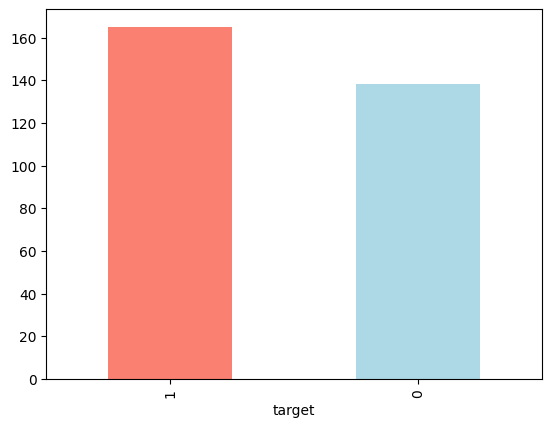

In [10]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### **Exploring Influence of Sex on the Dataset**

In [16]:
#compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


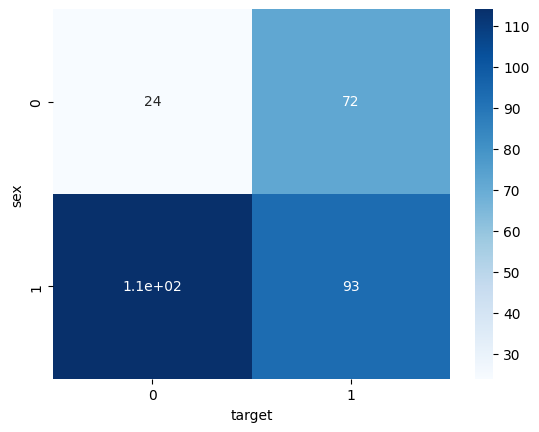

In [15]:
# Create a crosstab of sex and target
crosstab = pd.crosstab(df['sex'], df['target'])

# Create a heatmap
sns.heatmap(crosstab, annot=True, cmap='Blues')

# Show the plot
plt.show()

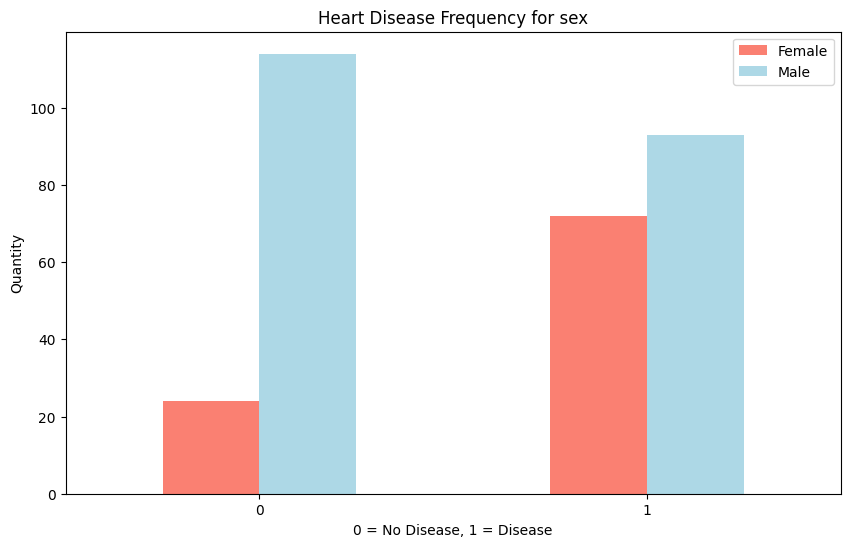

In [18]:
#Create a plot of the crosstab in bar chart
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

#Chart labels
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Quantity")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

### **Exploring Influence of Age on the Dataset**

<Axes: title={'center': 'age'}, ylabel='Frequency'>

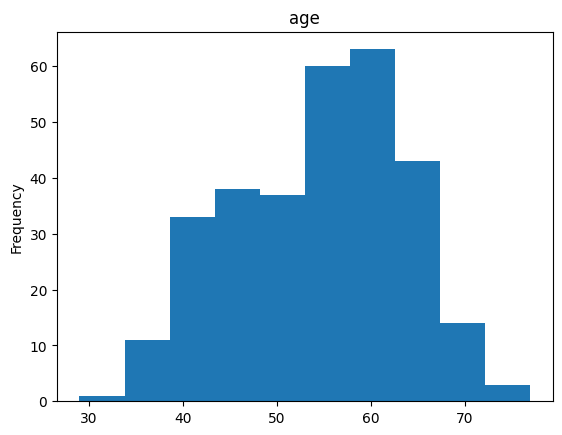

In [31]:
#Histogram of Age
df['age'].plot(kind='hist', bins=10, title='age')

**Comparing Max Heart Rate with Age**

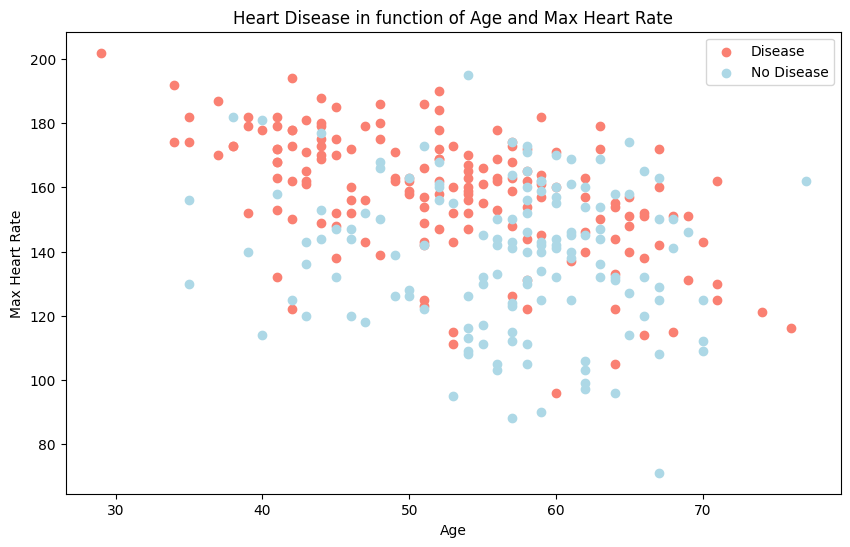

In [27]:
#Create another figure
plt.figure(figsize=(10, 6))

#Create a target of the positive targets in a scattterplot
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

#Create a target of the positive targets in a scattterplot
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");

#Chart labels
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

In [21]:
df['thalach'].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

### **Exploring relations of the chest pain types to heart disease**

cp - chest pain type (4 values)
  * 0: Typical angina: chest pain related decrease blood supply to heart
  * 1: Atypical angina: chest pain not related to heart
  * 2: Non-anginal pain: typically esophageal spasms (non heart related)
  * 3: Asymptomatic: chest pain not showing signs of disease

In [33]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


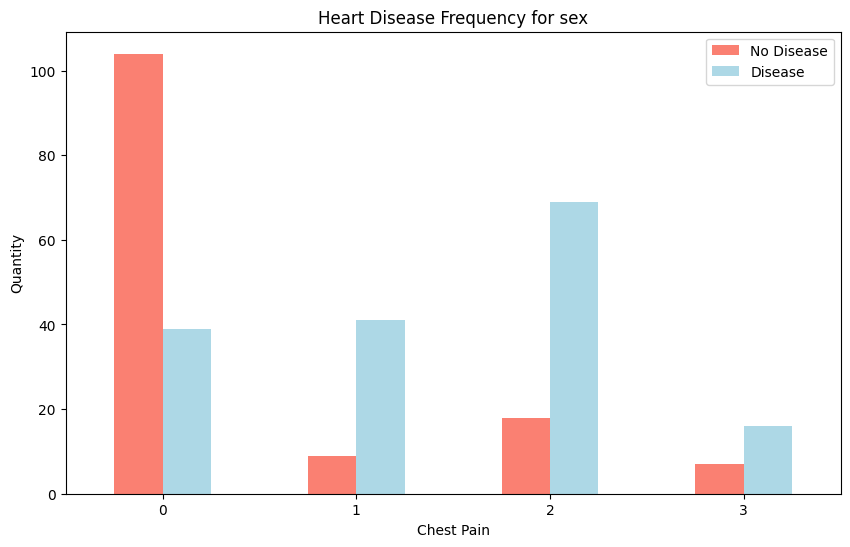

In [34]:
#Create a plot of the crosstab in bar chart
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

#Chart labels
plt.title("Heart Disease Frequency for sex")
plt.xlabel("Chest Pain")
plt.ylabel("Quantity")
plt.legend(["No Disease", "Disease"]);
plt.xticks(rotation=0);

In [35]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### **Exploring correlations of the columns**

In [36]:
#Making correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


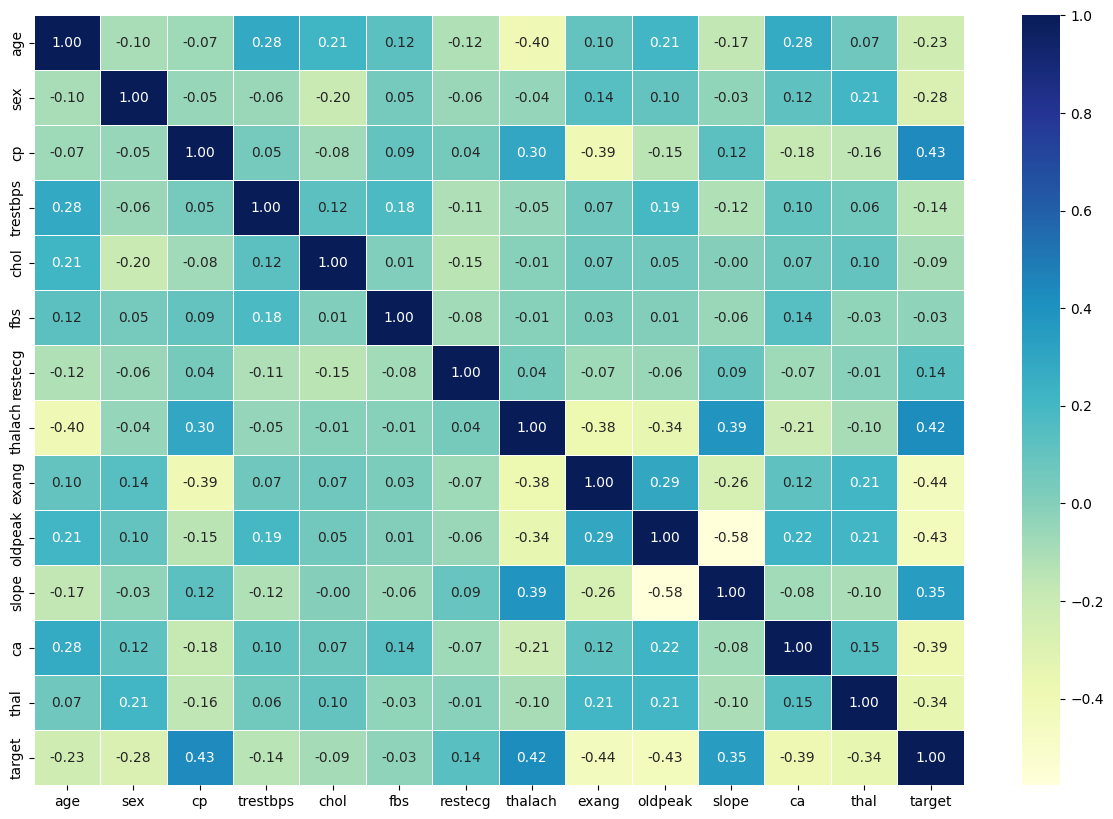

In [37]:
#Plotting a visual chart with seaborn heatmap
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

# **Preparing Data & Experimenting with ML Model**

## Preparing the data for ML

In [40]:
#Split data into X and y
X = df.drop("target", axis=1)
y = df["target"]

#Split the data into training and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## Experimenting with ML model

We're going to try out three different models:
1. Logistic Regression
2. K-Nearest Neighbour Classifier
3. Random Forest Classifier
4. Naive Bayes Classifier
5. SVM Classifier

In [47]:
#Creating a dictionary for the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
}

#Creating the function to fit and score the model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    #Set random seed
    np.random.seed(42)
    #Make a dictionary to keep model scores
    model_scores = {}
    #Loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

### **Developing Baseline Models**

In [48]:
#Creating a baseline model
models_scores = fit_and_score(models=models,
                              X_train=X_train,
                              X_test=X_test,
                              y_train=y_train,
                              y_test=y_test)

models_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918,
 'KNN': 0.6885245901639344,
 'Naive Bayes': 0.8688524590163934,
 'SVM': 0.7049180327868853}

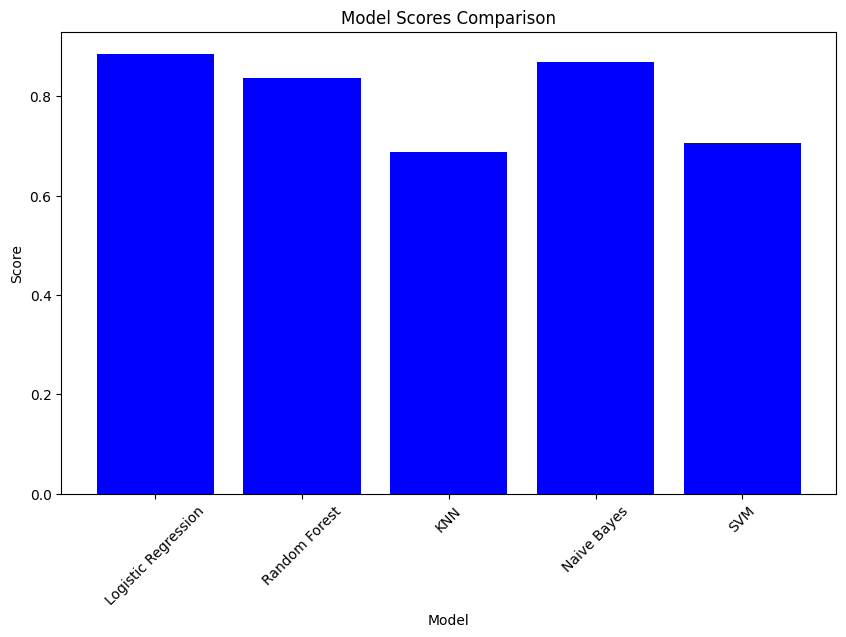

In [55]:
# Extract model names and scores from the dictionary
model_names = list(models_scores.keys())
model_scores = list(models_scores.values())

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, model_scores, color='blue')

# Add labels and title
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Model Scores Comparison")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the bar chart
plt.show()

Now, we have baseline models but the first model's prediction are not final, it should be improved and the quality of the model should be assessed. Let's look into the following next:
* Hyperparameter tunning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification report
* ROC Curve
* Area under the curve (AUC)

### **Tunning or improving the KNN**

Tunning by hand-coding

In [56]:
#Improve the KNN baseline scores
train_scores = []
test_scores = []

#Create a list of different values for n_neighbors
neighbors = range(1, 21)

#Setup KNN instance
knn = KNeighborsClassifier()

#Loop through different n_neighbors
for i in neighbors:
      knn.set_params(n_neighbors=i)
      #Fit the algorithm
      knn.fit(X_train, y_train)
      #Update the training scores list
      train_scores.append(knn.score(X_train, y_train))
      #Update the test scores list
      test_scores.append(knn.score(X_test, y_test))

In [57]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Maximum KNN score on the test data: 75.41%


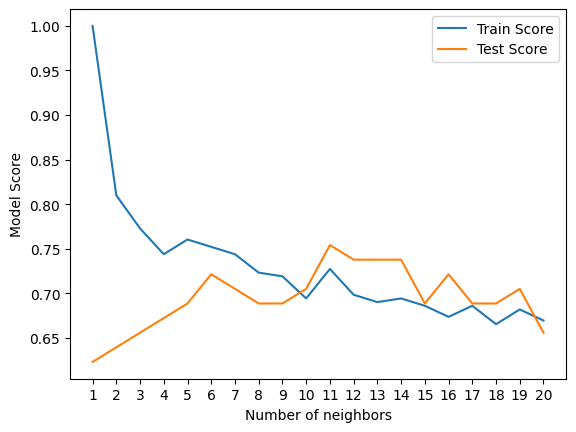

In [64]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### **Tunning the Logistic Regression Model & RandomForestClassifier**

Tunning with RandomizedSearchCV

In [67]:
#Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [68]:
#Tunning LogisticRegression
np.random.seed(42)

#Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

#Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [69]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [70]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [71]:
#Tunning RandomForestClassifier
np.random.seed(42)

#Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

#Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [72]:
#Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [73]:
rs_rf.score(X_test, y_test)

0.8688524590163934

### **Tuning LogisticRegression Model**

using GridSearchCV

In [74]:
#Diferent hyperparameter for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

#Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

#Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [75]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [76]:
#Evaluating the grid search LogisticRegression Model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating the Model

In [83]:
#Make predictions with the tuned model
y_preds = gs_log_reg.predict(X_test)

In [84]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [85]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

### **ROC Curve**

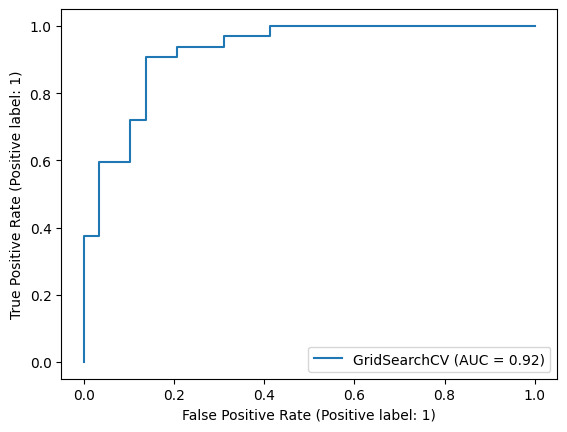

In [81]:
#Instantiate the RocCurveDisplay
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

### **Confusion Matrix**

In [86]:
#Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


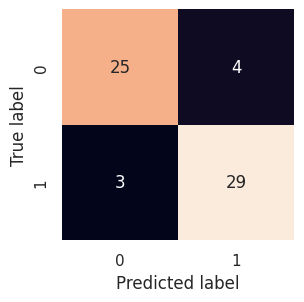

In [88]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis

plot_conf_mat(y_test, y_preds)

### **Classification Report**

In [89]:
#Calculating the classification report using normal train test split
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [90]:
#Calculating the classification report using cross validation

#check the best parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [92]:
#Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [93]:
#Cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")

cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [95]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [96]:
#Cross-validated precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")

cv_precision = np.mean(cv_acc)
cv_precision

0.8446994535519124

In [97]:
#Cross-validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")

cv_recall = np.mean(cv_acc)
cv_recall

0.8446994535519124

In [98]:
#Cross-validated f1
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")

cv_f1 = np.mean(cv_acc)
cv_f1

0.8446994535519124

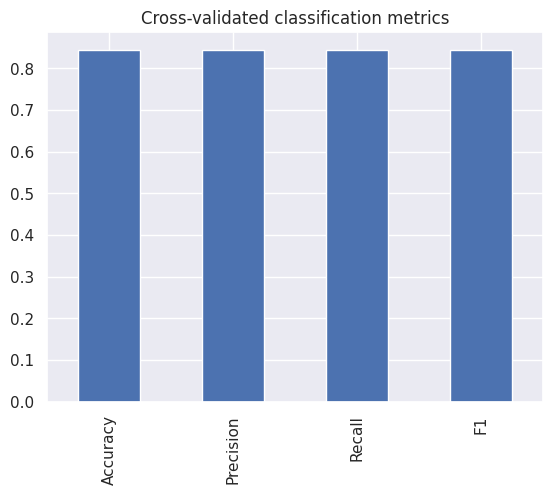

In [99]:
#Visualize the cross-validated metrics
cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc,
    "Precision": cv_precision,
    "Recall": cv_recall,
    "F1": cv_f1
}, index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False);

##Feature Importance

>This determines which feature contributed most to the outcomes of the model and how much did they contribute to the model prediction.

In [100]:
#Find the feature importance of LogisticRegression model

#Fit an instance of LogisticRegression
clf = LogisticRegression(C= 0.20433597178569418,
                         solver = 'liblinear')

clf.fit(X_train, y_train);

In [101]:
#Check co-efficience
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [103]:
#Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

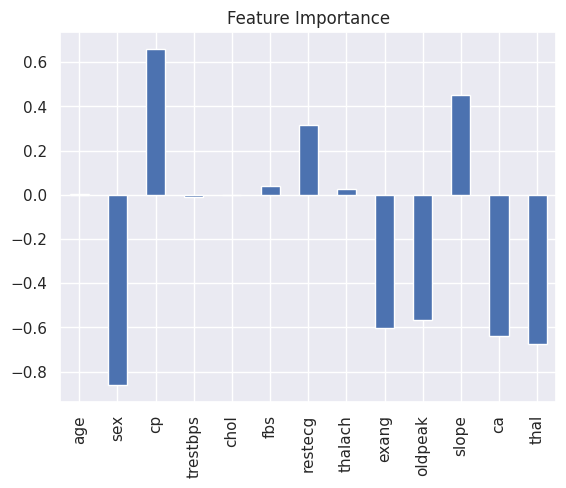

In [104]:
#Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

# **Conclusion & Next Steps**

Although the model has not met the expectation as set in the introducton chapter. We need to take the following steps:

1. Try to collect more data
2. Try another model
3. Try to mprove the current model using hyperparameter tuning (beyond what has been done so far).